In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm




%matplotlib inline

font = {'family' : 'serif',
        'size'   : 16}
text = {'usetex' : True}

plt.rc('font', **font)
plt.rc('text',**text)
plt.rc('axes', titlesize=18)

In [279]:
file_name = 'saturation3_summary.npz'
with np.load(file_name) as file:
    data = file['data'].item()
    
file_name = 'saturation3.2_summary.npz'
with np.load(file_name) as file:
    data2 = file['data'].item()

D = 50,\gamma = -0.9, M = 11.5, logN = 4.0 M, epoch_time = 16


(-50, 2500)

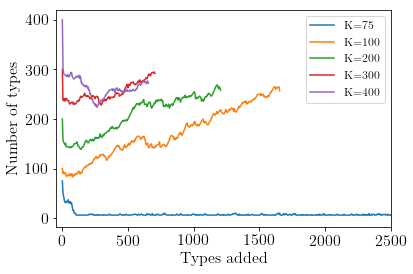

In [280]:
K_vec = data['K_vec']
D = data['D']
gamma = data['gamma']
M = data['M']
epoch_timescale = 16
logN = data['logN']
mu = data['mu']


num_alive_array = data['num_alive_array']
num_alive_array2 = data2['num_alive_array']


print('D = {},\gamma = {}, M = {:.1f}, logN = {} M, epoch_time = {}'.format(D,gamma,M,logN/M,epoch_timescale))

for ind0 in range(len(K_vec)):
    K = int(K_vec[ind0])
    num_alive = num_alive_array[ind0]
    num_alive = num_alive[np.isfinite(num_alive)]
    num_alive2 = num_alive_array2[ind0]
    num_alive2 = num_alive2[np.isfinite(num_alive2)]
    
    num_alive_full = np.concatenate((num_alive,num_alive2))
    
    if np.any(np.isfinite(num_alive_full)):
#         num_alive[np.isnan(num_alive)] = 0
#         if ind0>2:
#             num_alive[num_alive<10] = np.nan
        plt.plot(mu*np.arange(len(num_alive_full)),num_alive_full,label='K={}'.format(K))
    
plt.legend(prop={'size':12})
        
plt.ylabel('Number of types')
plt.xlabel('Types added')
plt.xlim((-50,2500))

In [3]:
file_name = 'saturation4_summary.npz'
with np.load(file_name) as file:
    data = file['data'].item()
    
file_name = 'saturation4.2_summary.npz'
with np.load(file_name) as file:
    data2 = file['data'].item()

D = 40,\gamma = -0.77, M = 11.5, logN = 4.0 M, epoch_time = 16 K M


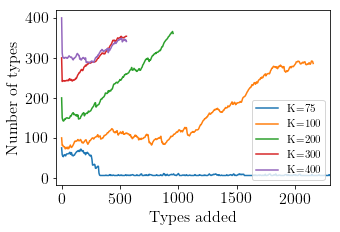

In [31]:
K_vec = data['K_vec']
D = data['D']
gamma = data['gamma']
M = data['M']
epoch_timescale = 16
logN = data['logN']
mu = data['mu']


num_alive_array = data['num_alive_array']
num_alive_array2 = data2['num_alive_array']

ind1 = 0

print('D = {},\gamma = {}, M = {:.1f}, logN = {} M, epoch_time = {} K M'.format(D,gamma,M,logN/M,epoch_timescale))


plt.figure(figsize=(5,3.5))
for ind0 in range(len(K_vec)):
    K = int(K_vec[ind0])
    num_alive = num_alive_array[ind0]
    num_alive = num_alive[np.isfinite(num_alive)]
    num_alive2 = num_alive_array2[ind0]
    num_alive2 = num_alive2[np.isfinite(num_alive2)]
    
    num_alive_full = np.concatenate((num_alive,num_alive2))
    
    if np.any(np.isfinite(num_alive_full)):
#         num_alive[np.isnan(num_alive)] = 0
#         if ind0>2:
#             num_alive[num_alive<10] = np.nan
        plt.plot(mu*np.arange(len(num_alive_full)),num_alive_full,label='K={}'.format(K))
    
        

plt.legend(prop={'size':11},loc=4)
        
plt.ylabel('Number of types')
plt.xlabel('Types added')
plt.xlim((-50,2300))

plt.tight_layout()

plt.savefig('scaling_with_K_legend_atish.pdf')

In [310]:
file_name = 'saturation3_summary.npz'
with np.load(file_name) as file:
    data = file['data'].item()

Fraction of extinctions after halfway in epoch: 0.07


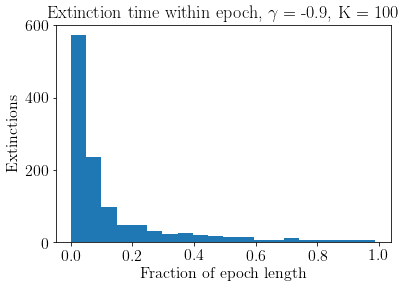

In [311]:
K_ind = 1
extinct_times = data['extinct_time_list'][K_ind]
epoch_times = data['epoch_time_list'][K_ind]

running_times = np.cumsum(epoch_times)

epoch_fraction_list = []

for ind in range(len(running_times)-1):
    
    end_time = running_times[ind]
    start_time = running_times[ind]-epoch_times[ind]
    extinct_in_epoch = np.logical_and(extinct_times<end_time,extinct_times>=start_time)
    
    epoch_fraction = (extinct_times[extinct_in_epoch] - start_time)/epoch_times[ind]
    
    epoch_fraction_list.append(epoch_fraction)
    
fracs = np.concatenate(epoch_fraction_list)
plt.hist(fracs,20)
# plt.yscale('log')

print('Fraction of extinctions after halfway in epoch: {:.2f}'.format(np.sum(fracs>.5)/len(fracs)))
plt.ylabel('Extinctions')
plt.xlabel('Fraction of epoch length')
plt.title(r'Extinction time within epoch, $\gamma$ = {}, K = {}'.format(data['gamma'],data['K_vec'][K_ind]))

In [308]:
file_name = 'saturation4_summary.npz'
with np.load(file_name) as file:
    data = file['data'].item()

Fraction of extinctions after halfway in epoch: 0.13


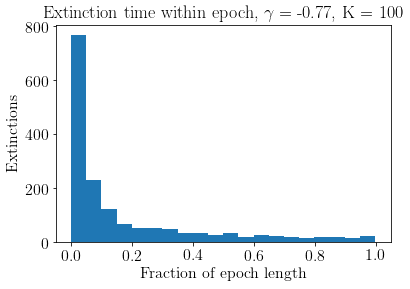

In [309]:
K_ind = 1
extinct_times = data['extinct_time_list'][K_ind]
epoch_times = data['epoch_time_list'][K_ind]

running_times = np.cumsum(epoch_times)

epoch_fraction_list = []

for ind in range(len(running_times)-1):
    
    end_time = running_times[ind]
    start_time = running_times[ind]-epoch_times[ind]
    extinct_in_epoch = np.logical_and(extinct_times<end_time,extinct_times>=start_time)
    
    epoch_fraction = (extinct_times[extinct_in_epoch] - start_time)/epoch_times[ind]
    
    epoch_fraction_list.append(epoch_fraction)
    
fracs = np.concatenate(epoch_fraction_list)
plt.hist(fracs,20)
# plt.yscale('log')

print('Fraction of extinctions after halfway in epoch: {:.2f}'.format(np.sum(fracs>.5)/len(fracs)))
plt.ylabel('Extinctions')
plt.xlabel('Fraction of epoch length')
plt.title(r'Extinction time within epoch, $\gamma$ = {}, K = {}'.format(data['gamma'],data['K_vec'][K_ind]))